In [7]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Gas data for Great Britain

%store -r rhoSAP_BZNGB
%store -r pSAP_BZNGB
%store -r CompGasGB
%store -r MSAP
%store -r CSAP

# Generation data for Great Britain

%store -r CorrGB
%store -r GBGen

CorrGB

,Generation,Max. Value,rho,p,m,c,a,b
0,Gas,551956.0,0.300905,9.618164e-17,NaN,NaN,0.001797,92.961861
1,Coal,72060.0,0.316199,2.055946e-18,NaN,NaN,0.010622,139.297943
2,Wind,374393.5,-0.124960,7.150992e-04,NaN,NaN,-0.000969,184.564608


     Gas Predicted [EUR/MWh]  Coal Predicted [EUR/MWh]  \
0                     166.91                    158.99   
1                     180.47                    173.21   
2                     163.64                    162.40   
3                     178.87                    178.45   
4                     192.07                    226.96   
..                       ...                       ...   
725                   105.04                    156.98   
726                   106.88                    150.71   
727                   103.35                    149.82   
728                   103.54                    157.38   
729                   117.08                    169.46   

     Wind Predicted [EUR/MWh]  
0                      167.47  
1                      169.24  
2                      159.73  
3                      151.61  
4                      154.71  
..                        ...  
725                    140.87  
726                    137.42  
727            

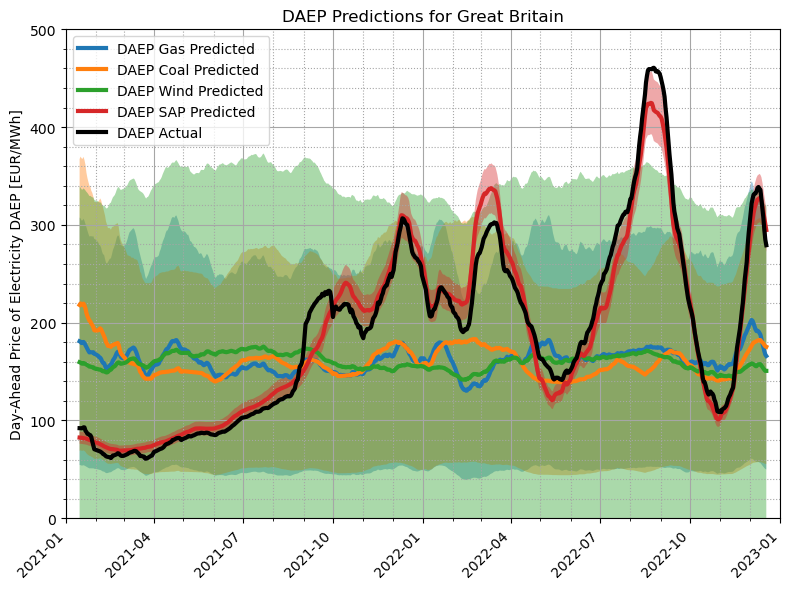

In [8]:
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(8)

plt.title('DAEP Predictions for Great Britain')
plt.ylabel('Day-Ahead Price of Electricity DAEP [EUR/MWh]')

#ax.plot(GBGen["Date"], GBGen["GB DAEP [EUR/MWh]"], color = "navy")
#plt.fill_between(GBGen["Date"], GBGen["GB DAEP [EUR/MWh]"], color="navy")

c = pd.DataFrame(["blue", "lightblue", "green", "aquamarine", "orange", "moccasin"])

DAEPwei = pd.DataFrame()
CorrGB = CorrGB.replace(np.NaN, "N/A")

for i in range(0, len(CorrGB.iloc[:,0])):
    Name = CorrGB.iloc[i,0]
    Gen = GBGen[f"{Name} [MWh]"]
    
    d = CorrGB.iloc[i,1]
    
    if d > 1000000:
        Gen = Gen/1000000
    if 1000000 > d > 1000:
        Gen = Gen/1000
        
    rho = CorrGB.iloc[i,2]
    
    if CorrGB.iloc[i,6] == "N/A":
        m = CorrGB.iloc[i,4]
        c = CorrGB.iloc[i,5]
        DAEPwei[f"{Name} Predicted [EUR/MWh]"] = m*Gen + c
    if CorrGB.iloc[i,4] == "N/A":
        a = CorrGB.iloc[i,6]
        b = CorrGB.iloc[i,7]
        DAEPwei[f"{Name} Predicted [EUR/MWh]"] = b*np.exp(a*Gen)
    
    plt.fill_between(GBGen["Date"], (rho)*DAEPwei[f"{Name} Predicted [EUR/MWh]"].rolling(28,  center=True).mean(),
                 (2-rho)*DAEPwei[f"{Name} Predicted [EUR/MWh]"].rolling(28,  center=True).mean(), alpha=0.4)
    ax.plot(GBGen["Date"], DAEPwei[f"{Name} Predicted [EUR/MWh]"].rolling(28,  center=True).mean(),
            linewidth=3, label = f"DAEP {Name} Predicted")
    
print(DAEPwei.round(2))

DAEPwei["SAP Predicted [EUR/MWh]"] = MSAP*CompGasGB["GB Gas SAP [EUR/MWh]"].astype(float)+CSAP
plt.fill_between(GBGen["Date"], (rhoSAP_BZNGB)*DAEPwei["SAP Predicted [EUR/MWh]"].rolling(28,  center=True).mean(),
                 (2-rhoSAP_BZNGB)*DAEPwei["SAP Predicted [EUR/MWh]"].rolling(28,  center=True).mean(), alpha=0.4)
ax.plot(GBGen["Date"], DAEPwei["SAP Predicted [EUR/MWh]"].rolling(28,  center=True).mean(),
        linewidth=3, label = "DAEP SAP Predicted")
ax.plot(GBGen["Date"], GBGen["GB DAEP [EUR/MWh]"].rolling(28,  center=True).mean(),
        linewidth=3, color = "black", label="DAEP Actual")

plt.legend()

plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(0, 500)
plt.tight_layout()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()

In [36]:
print(DAEPwei)

     Gas Predicted [EUR/MWh]  Wind Predicted [EUR/MWh]  \
0                 166.914367                167.466910   
1                 180.472539                169.236937   
2                 163.638380                159.734836   
3                 178.871474                151.606591   
4                 192.070051                154.705035   
..                       ...                       ...   
725               105.039035                140.866883   
726               106.876825                137.421297   
727               103.346379                132.172784   
728               103.541616                128.726062   
729               117.079304                151.135300   

     SAP Predicted [EUR/MWh]  
0                  80.413493  
1                  80.635534  
2                  80.244854  
3                  82.757223  
4                  77.912001  
..                       ...  
725               210.475138  
726               193.100646  
727               188.55

In [38]:
d = CorrGB.iloc[i,1]
if d > 1000000:
        Gen = Gen/1000000
    if 1000000 > d > 1000:
        Gen = Gen/1000
    
    if CorrGB.iloc[i,6] == np.NaN:
        m = CorrGB.iloc[i,4]
        c = CorrGB.iloc[i,5]
        DAEPwei[f"{Name}"] = m*Gen + c
    if CorrGB.iloc[i,4] == np.NaN:
        a = CorrGB.iloc[i,6]
        b = CorrGB.iloc[i,7]
        DAEPwei[f"{Name}"] = b*np.exp(a*Gen)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)